# Data Visualization

This tutorial shows you how to use the `safeds.plotting` module to visualize your data and understand it better.

## The data

First, we need some data to visualize. For this, we use the common example of the Titanic disaster, which is also included in our [`safe-ds-examples` package](https://pypi.org/project/safe-ds-examples). If you want to know more about the dataset, check out its [documentation](https://library-examples.safe-ds.com/en/latest/examples/titanic/). Naturally, you can also use your own data.

In [1]:
from safeds.data.tabular.containers import Table

titanic = Table.from_csv_file("data/titanic.csv")

Let's have a quick look at the first 10 rows of the data:

In [2]:
titanic.slice_rows(length=10)

id,name,sex,age,siblings_spouses,parents_children,ticket,travel_class,fare,cabin,port_embarked,survived
i64,str,str,f64,i64,i64,str,i64,f64,str,str,i64
0,"""Abbing, Mr. Anthony""","""male""",42.0,0,0,"""C.A. 5547""",3,7.55,null,"""Southampton""",0
1,"""Abbott, Master. Eugene Joseph""","""male""",13.0,0,2,"""C.A. 2673""",3,20.25,null,"""Southampton""",0
2,"""Abbott, Mr. Rossmore Edward""","""male""",16.0,1,1,"""C.A. 2673""",3,20.25,null,"""Southampton""",0
3,"""Abbott, Mrs. Stanton (Rosa Hun…","""female""",35.0,1,1,"""C.A. 2673""",3,20.25,null,"""Southampton""",1
4,"""Abelseth, Miss. Karen Marie""","""female""",16.0,0,0,"""348125""",3,7.65,null,"""Southampton""",1
5,"""Abelseth, Mr. Olaus Jorgensen""","""male""",25.0,0,0,"""348122""",3,7.65,"""F G63""","""Southampton""",1
6,"""Abelson, Mr. Samuel""","""male""",30.0,1,0,"""P/PP 3381""",2,24.0,null,"""Cherbourg""",0
7,"""Abelson, Mrs. Samuel (Hannah W…","""female""",28.0,1,0,"""P/PP 3381""",2,24.0,null,"""Cherbourg""",1
8,"""Abrahamsson, Mr. Abraham Augus…","""male""",20.0,0,0,"""SOTON/O2 3101284""",3,7.925,null,"""Southampton""",1


The visualizations we present in this tutorial work on numerical data only. So, let's remove the columns that are not numerical and let's get rid of the `id` column as well while we are at it:

In [3]:
titanic_numerical = titanic.remove_columns(
    ["id", "name", "sex", "ticket", "cabin", "port_embarked"]
)

## Correlation heatmap

The correlation heatmap is ideal to get a quick overview of the relationships between the columns in your dataset. Each cell represents the correlation between two columns as a value between -1 and 1:

* A negative value (blue) means that if one column increases, the other decreases.
* A positive value (red) indicates that if one column increases, the other increases as well.
* A value of 0 (white) means that the two columns are not correlated at all.

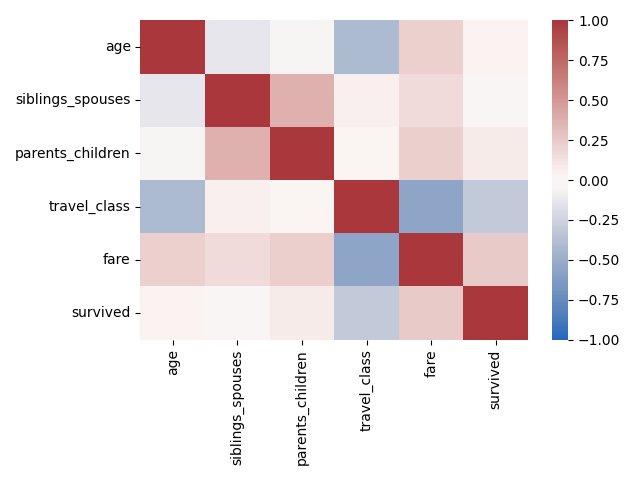

In [4]:
titanic_numerical.plot.correlation_heatmap()

Let's look at the correlations involving the `travel_class` column:

* `travel_class` is negatively correlated with `age`. This means that older passengers tended to travel in better travel classes (1st/2nd class) than younger passengers.
* `travel_class` has no strong correlation with either `siblings_spouses` or `parents_children`.
* `travel_class` is, unsurprisingly, positively correlated with itself. You'll always find that the diagonal of a correlation heatmap is bright red.
* `travel_class` is negatively correlated with `fare`. Naturally, better travel classes were more expensive.
* `travel_class` is negatively correlated with `survived`. People in better travel classes were more likely to survive the accident.

## Lineplot

Next, we use a lineplot to better understand the relationship between `survived` and `fare`. The line itself represents the mean value and the hued area around it a 95% confidence interval around the mean.

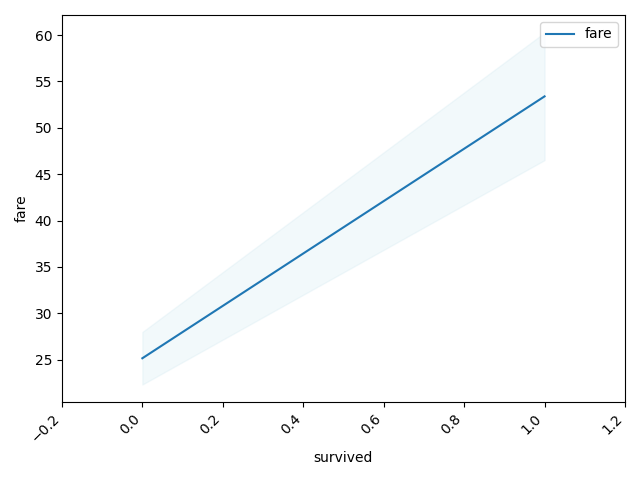

In [5]:
titanic_numerical.remove_rows_with_missing_values().plot.line_plot("survived", ["fare"])

We can conclude that survivors paid around twice as much for their ticket as non-survivors.

## Boxplot

A boxplot is a type of univariate graphic display of the distribution of a numerical dataset. Univariate refers to the analysis of a single variable at a time.

* It displays the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum values.
* It also shows any potential outliers in the data.

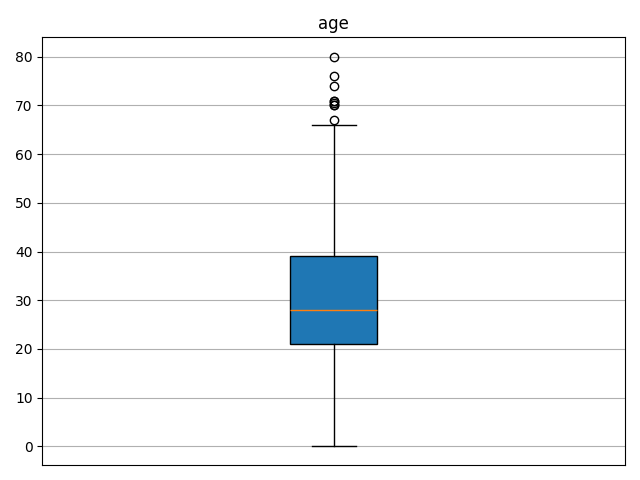

In [6]:
titanic_numerical.get_column("age").plot.box_plot()

* The above boxplot depicts the `age` range from 0 to 80 including outliers. It can be deduced that the middle 50% of passengers were between the ages of 20 and 40, because this is where the box lies and is less influenced by outliers.
* Moreover, the boxplot clearly depicts outliers which are the dots found above the T-shaped whisker. It can further be deduced with the help of the median that half of the passengers were aged below 28 years and the other half were above 28 years.

## Boxplot of all numerical columns

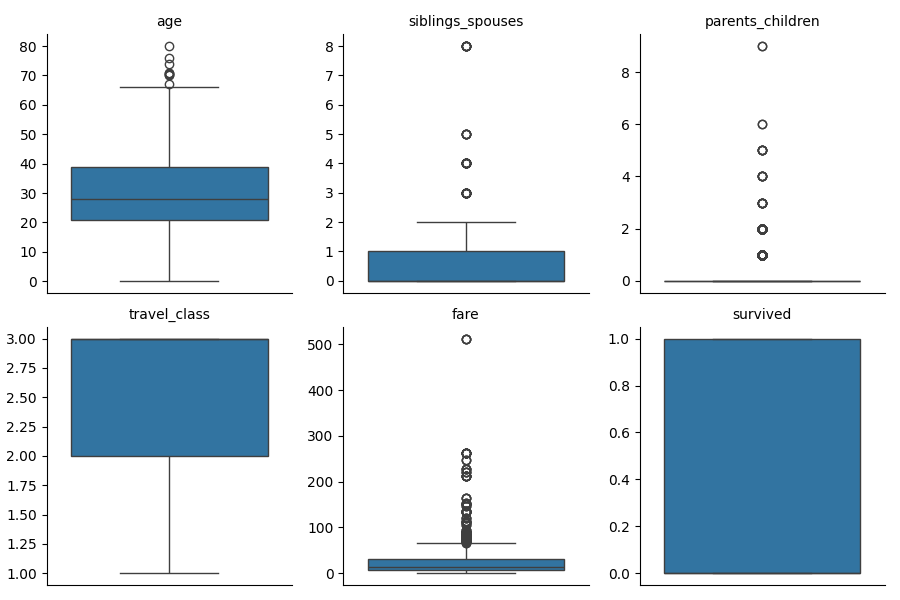

In [7]:
titanic_numerical.plot.box_plots()

Let's look at the different boxplots of all numerical columns:

* The second boxplot depicts the number of passengers with `siblings/spouses` aboard the Titanic from 0 to 8. Here, the middle 50% of passengers had either 0 or 1 sibling/spouse and the rest were considered outliers.
* The `parents/children` boxplot illustrates the count rate of the number of passengers with `parents/children`. More than 80% of the passengers had no parents nor children with them because the upper and lower whiskers including the box are on 0. The rest were considered outliers.
* The `travel_class` boxplot has its middle 50% of passengers either in the 2nd or 3rd class. The remaining passengers were considered first class.
* In the `fare` boxplot, the box lies somewhere between 10 and 40. This implies that about half of the passengers paid a passenger fare below 20. The other half paid above 20. It was also dominated by extreme outliers. An extreme outlier is a value 3 times the difference between the 75th percentile and the 25th percentile (3 x IQR).
* The last boxplot, `survived`, depicts the survival rate of all passengers between 0.0 and 1.0. It is clear that box plot is not a good graphic display for such a variable because it is either a passenger survived (1) or died (0).

## Histogram

A histogram is a graphic display that divides the x-axis into intervals or bins.

* The height of the bars correspond to the number of values in that bin or interval.
* Each bar has an area which shows the proportion of values in the range. They can help to predict the probability of getting future measurements.

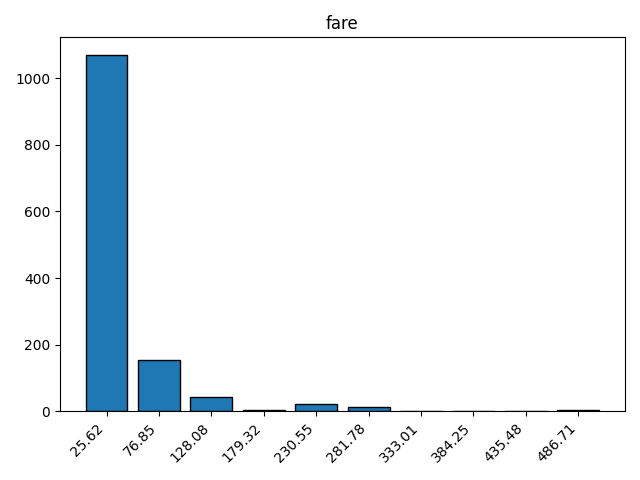

In [8]:
titanic_numerical.get_column("fare").plot.histogram()

In the `fare` histogram, the tallest bar has the highest number of passengers with a count of 420. While reflecting its base on the x-axis, it can be deduced that about 420 passengers paid a fare of about 10 pounds meanwhile, the last bar to the right indicates that 5 passengers paid a fare of about 510 pounds.

## Histogram of all columns

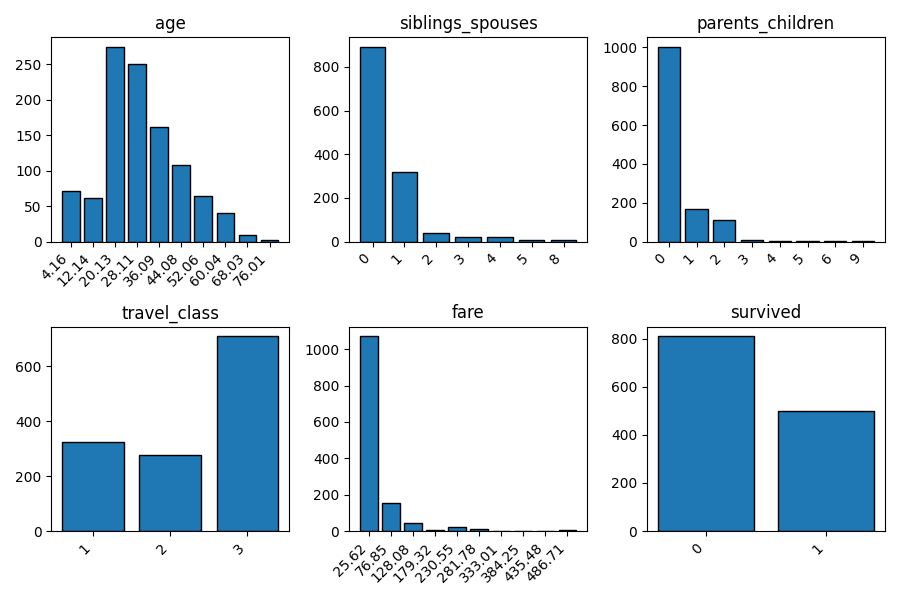

In [9]:
titanic_numerical.plot.histograms()

Let's look at the different histograms of certain columns:
* According to the `age` histogram, a majority of the passengers were aged between 20 and 40. If the bars within this range are added up, about 750 passengers fall between this age range. Just a few passengers were above 75 years.
    * It is worth noting, that we can use the `normal distribution` here to approximate the data and future measurements. The normal distribution is a symmetric bell-shaped curve with a continuous range from -infinity to +infinity and has a common value for mean, median, and mode.
* The `siblings_spouses` histogram illustrates that a majority of the passengers, about 900 had no siblings nor spouses. Meanwhile, for the rest of the passengers, every passenger had at least a sibling or spouse.
* As per the `parents_children` histogram, most passengers were neither accompanied by a parent nor child.
* In the histogram for the `travel_class` column, it can be observed that more than 50% of the passengers were categorised as 3rd class passengers. Just about half of the remaining passengers were categorised as 2nd class and the rest were 1st class passengers.
* The last histogram, `survived` depicts the survival rate of all passengers. About 800 passengers died meanwhile more than 500 passengers survived.


## Scatterplot
A scatterplot is a type of graph that displays the relationship between two numerical variables. It provides insights on the distribution pattern, trend, and individual points deviating significantly from the majority of observations called outliers.

In [10]:
titanic_numerical.plot.scatter_plot("age", ["fare"])

ValueError: there are missing values in column 'fare', use transformation to fill missing values or drop the missing values

The above scatterplot uses the `age` and `fare` columns from the Titanic dataset to plot each data point that represents a passenger. It can be inferred, that more than 50% of the passengers paid a fare less than 50 pounds. Three passengers of the ages ~35 and 60 paid a fare of about 500 pounds and were considered outliers.
